<a href="https://colab.research.google.com/github/Annmodels/mnist_recon/blob/master/BcnnMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [0]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [0]:
xtrain = xtrain.reshape((xtrain.shape[0],28,28,1)).astype('float32')
xtest = xtest.reshape((xtest.shape[0],28,28,1)).astype('float32')
xtrain = xtrain/255
xtest = xtest/255
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)
numclasses = ytest.shape[1]

In [0]:
def basemodel():
  model = Sequential()
  model.add(Conv2D(32,(5,5),input_shape = (28,28,1),activation = 'relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128,activation = 'relu'))
  model.add(Dense(numclasses,activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  return model

In [0]:
model = basemodel()
model.fit(xtrain,ytrain,validation_data = (xtest,ytest),epochs = 10,batch_size = 200)
scores = model.evaluate(xtest,ytest,verbose = 1)
print("cnn error:%.2f%%"%(100-scores[1]*100))
model.save("my_model.h5")

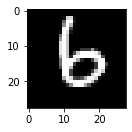

In [0]:
import matplotlib.pyplot as plt
j = 534
(ox,oy),(oxt,oyt) = mnist.load_data()
plt.subplot(221)
plt.imshow(ox[j],cmap = plt.get_cmap('gray'))
plt.show()

In [0]:
import tensorflow as tf
import numpy as np
newmodel = tf.keras.models.load_model("my_model.h5")
vsx = ox.reshape((ox.shape[0],28,28,1)).astype('float32')
vsx = vsx/255
vsxj = vsx[j]
#print(vsxj.shape)
vsxj = vsxj.reshape(1,28,28,1)
#print(vsxj.shape)

##vsy = np_utils.to_categorical(oy)
#print(vsy.shape)
##vsyj = vsy[j]
##vsyj = vsyj.reshape(1,10)
#print(vsyj.shape)
##vsnew = newmodel.evaluate(vsxj,vsyj,verbose = 0)
##print(vsnew)
##print("vbe:%.2f%%"%(100-vsnew[1]*100))
ypred = newmodel.predict(vsxj)
#print(ypred)
print(np.argmax(ypred))

6
